# Making publication ready plots with `Matplotlib`
`Matplotlib` makes it easy to make quick plots in python, unfortunately the default style is very ugly and is not publication ready.  The good news is it has become much easier to customize in the past few years.

## Packages being used
+ `matplotlib`: all the plotting is done here
+ `astropy`: has an override for the histogram function for finding bin widths

## Relevant documentation
+ `matplotlib`: https://matplotlib.org/stable/api/pyplot_summary.html, https://matplotlib.org/stable/tutorials/introductory/customizing.html, https://matplotlib.org/stable/gallery/index.html, https://matplotlib.org/stable/tutorials/colors/colormaps.html
+ `astropy`: https://docs.astropy.org/en/stable/visualization/histogram.html

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from astropy.visualization import hist
%matplotlib inline

mpl.style.use('classic')

## Make some test data to plot
To test out various plots lets create some fake data sets.

### 1D data set

In [2]:
# generate some complicated data
rng = np.random.RandomState(0)
one_d = np.concatenate([-5 + 1.8 * rng.standard_cauchy(500),
                        -4 + 0.8 * rng.standard_cauchy(2000),
                        -1 + 0.3 * rng.standard_cauchy(500),
                         2 + 0.8 * rng.standard_cauchy(1000),
                         4 + 1.5 * rng.standard_cauchy(1000)])

# truncate to a reasonable range
one_d = one_d[(one_d > -15) & (one_d < 15)]

### 2D image

In [3]:
x_img = np.arange(0, np.pi, 0.1)
y_img = np.arange(0, 2*np.pi, 0.1)
X_img, Y_img = np.meshgrid(x_img, y_img)
image = np.cos(X_img) * np.sin(Y_img) * 10

### 2D line

In [4]:
x = np.arange(10)
y = np.zeros(10)

### 2D scatter

In [5]:
n = 100000
x_scatter = np.random.standard_normal(n)
y_scatter = 2 + 3 * x_scatter + 4 * np.random.standard_normal(n)

# The Old Defaults (and why they are bad)
Lets take a look at `matplotlib`'s default styles for these types of plots

## Histograms
This example also shows how to create subplots using `GridSpec` (see https://matplotlib.org/stable/gallery/userdemo/demo_gridspec03.html#sphx-glr-gallery-userdemo-demo-gridspec03-py), change the figure size, and how to use latex in your labels.

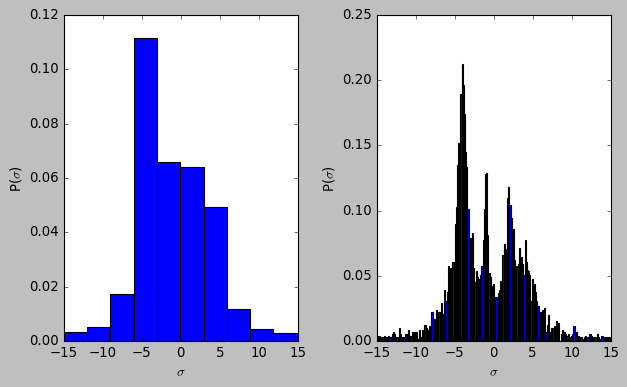

In [6]:
plt.figure(1, figsize=(8, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.hist(one_d, bins=10, density=True)
ax1.set_xlabel(r'$\sigma$')
ax1.set_ylabel(r'P($\sigma$)')
ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.hist(one_d, bins=200, density=True)
ax2.set_xlabel(r'$\sigma$')
ax2.set_ylabel(r'P($\sigma$)')
# make sure subplots don't overlap
plt.tight_layout();

### Issues
+ bins size needs to be set "by eye"
+ each bin is drawn as a filled rectangle
+ font size is small
+ tick size is small
+ lines are too thin

## Images

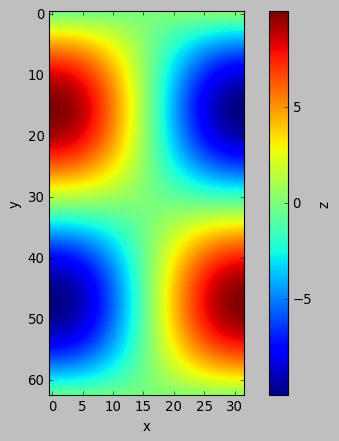

In [7]:
plt.figure(2)
plt.imshow(image)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('z');

### issues
+ color map is about as bad as it gets (e.g. https://eagereyes.org/basics/rainbow-color-map, http://bids.github.io/colormap/)
+ font size is small
+ tick size is small
+ lines are too thin

## Line plots
For this example we will show a set of horizontal lines that are all labeled.

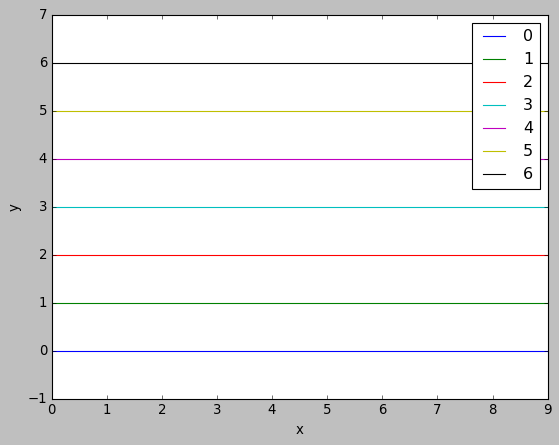

In [8]:
plt.figure(3)
for i in range(7):
    plt.plot(x, y + i, label='{0}'.format(i))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1, 7)
plt.legend();

### issues
+ colors are harsh on the eyes
+ font size is small
+ tick size is small
+ lines are too thin
+ legend could be formatted better

## 2D scatter plots

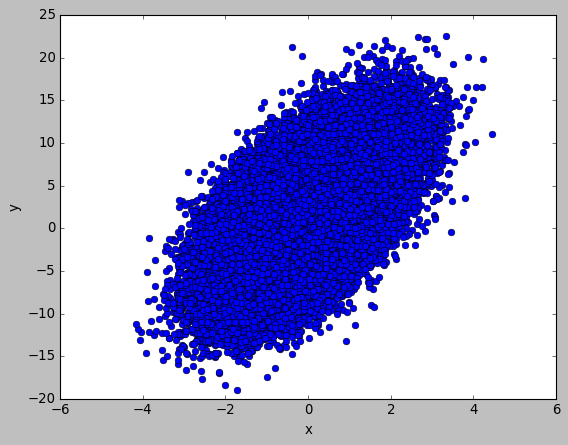

In [9]:
plt.figure(4)
plt.plot(x_scatter, y_scatter, 'o')
plt.xlabel('x')
plt.ylabel('y');

### issues
+ there is no useful information contained in the high density regions
+ font size is small
+ tick size is small
+ lines are too thin

# Doing things better
The easiest way to make consistent plots is to define a new `matplotlib` style in its own `.py` file and import it every time you want to plot some data.  Included in with these notebooks is and example style file `mpl_style.py` that increases line widths, increases fonts sizes, uses a better color cycle, formats ticks and axes larger, and sets to default colormap to something reasonable (`magma`, `plasma`, `inferno`, and `viridis` are all color blind friendly and convert to black and white without issue).

In [10]:
mpl.style.use('default')
import mpl_style
plt.style.use(mpl_style.style1)

## Histograms
`astropy.visualization` has a wrapper for the default `hist` function that will automatically pick the bin width based on the data.  Additionally we will add some keywords to make the histogram look better.

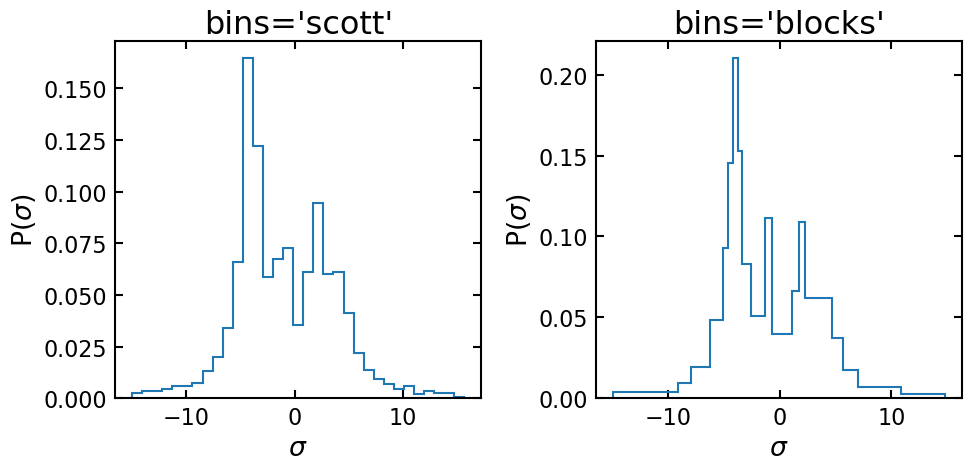

In [11]:
plt.figure(5, figsize=(10, 5))
ax1 = plt.subplot2grid((1, 2), (0, 0))
hist(one_d, bins='scott', ax=ax1, density=True, histtype='step', lw=1.5)
ax1.set_title("bins='scott'")
ax1.set_xlabel(r'$\sigma$')
ax1.set_ylabel(r'P($\sigma$)')
ax2 = plt.subplot2grid((1, 2), (0, 1))
hist(one_d, bins='blocks', ax=ax2, density=True, histtype='step', lw=1.5)
ax2.set_title("bins='blocks'")
ax2.set_xlabel(r'$\sigma$')
ax2.set_ylabel(r'P($\sigma$)')
# make sure subplots don't overlap
plt.tight_layout()

## Images

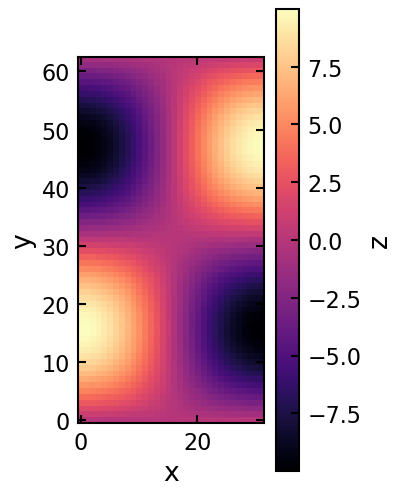

In [12]:
plt.figure(6, figsize=(3, 6))
plt.imshow(image)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('z')

Since this images is symmetrical about 0, it would best if we use a diverging colorbar (**note** if the data was not symmetric you can use the `vmin` and `vmax` keywords to make the color scale symmetric.):

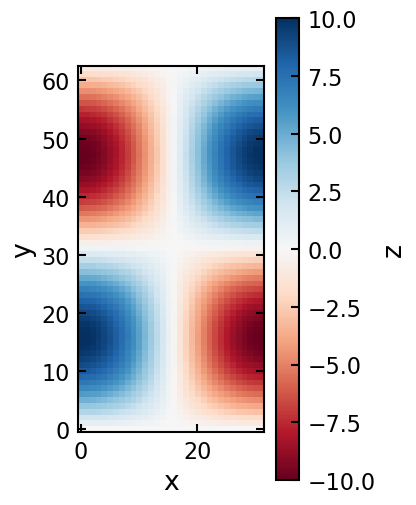

In [13]:
plt.figure(7, figsize=(3, 6))
plt.imshow(image, cmap=plt.cm.RdBu, vmin=-10, vmax=10)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('z')

## Line plots
Adding a few more keywords to the `legend` and slightly adjusting the plot range we can make it look much better:

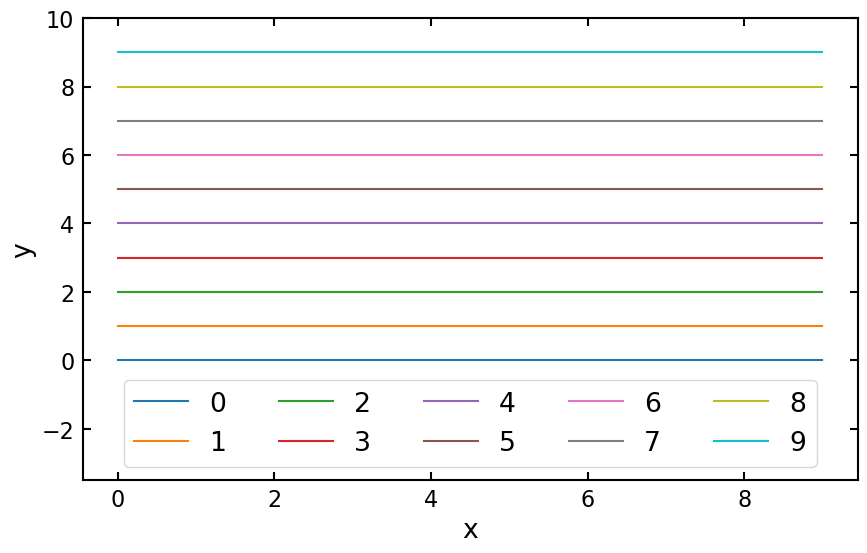

In [14]:
plt.figure(8, figsize=(10, 6))
for i in range(10):
    plt.plot(x, y + i, label='{0}'.format(i))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-3.5, 10)
plt.legend(loc='lower center', ncol=5);

## 2D scatter plots
Since the goal of this plot is to show density we should plot it as a 2D-histogram instead of scatter points.  To avoid various binning issues I recommend using `hexbin` and a colormap that is white at 0:

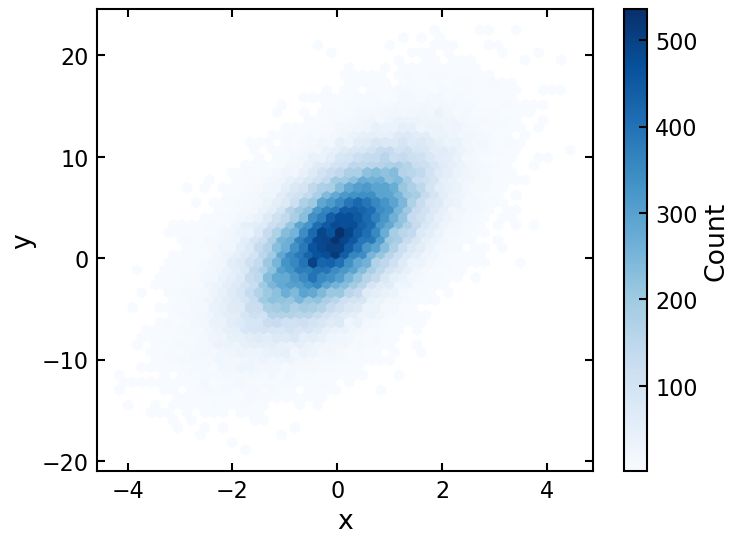

In [15]:
plt.figure(9)
plt.hexbin(x_scatter, y_scatter, gridsize=50, mincnt=1, cmap=plt.cm.Blues, zorder=-1)
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar()
cbar.set_label('Count');

# Saving a figure
To save the current figure using the `plt.savefig(<filename>)` command.  For data analysis `.png` are fine, for publication `.pdf` will be needed.  **Note** if you have a large number of objects drawn (e.g. scatter points) in a figure the `.pdf` will be slow to open since everything is saved in vector format.  In these cases I would recommend rasterizing as many of the objects as you can (e.g. the scatter points) but leaving the axes as vectors.  This can be done by setting the axes rasterization zorder via `plt.gca().set_rasterization_zorder(1)`, any object with `zorder<1` will be rasterized, and all other object (including the axes) will be victorized.

Rasterization can also be used to "trick" `.eps` and `.ps` file formats to using transparency: https://osxastrotricks.wordpress.com/2014/01/19/rasterized-graphics-with-matplotlib-to-preserve-plot-transparencies-for-apj-figures/

# Tips and tricks
+ whenever possible don't put plotting commands inside a loop, each time a new command is called the entire figure is redrawn, meaning each pass through the loop will take longer than the previous pass.  Instead you can pass the plot function 2D arrays and each _column_ will be plotted as a different line.
+ change marker face colors and marker edge colors with the `mfc` and `mec` keywords
+ change the line style and line width with the `ls` and `lw` keywords
+ use the `alpha` keyword to set transparency
+ use the `zorder` keyword to control what objects are ploted on top
+ turn on minor tick marks with `plt.minorticks_on()`
+ set custom tick positions and labels using `plt.xticks()` and `plt.yticks()`
+ use interactive mode with `plt.ion()` (the `plt.show()` command is not input blocking, **note** currently dose not work on macs)
+ get the current figure object with `plt.gcf()`
+ get the current axes object with `plt.gca()`
+ clear the current figure with `plt.clf()`
+ reverse an axis with `plt.gca().invert_xaxis()` or `plt.gca().invert_yaxis()`
+ make log plots with `plt.semilogx()`, `plt.semilogy()`, or `plt.loglog()`
+ plot error bars with `plt.errorbar()`
+ get ideas and examples from the `matplotlib` gallery: https://matplotlib.org/stable/gallery/index.html
+ get a list of all the available plot functions: https://matplotlib.org/stable/api/pyplot_summary.html
+ get a list of all available colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html